# Preliminaries

In [1]:
# User-defined paths
GDC_download_folder='/Volumes/omics4tb2/alomana/projects/PSL/breast/data/gdc_download_20190806_215820.857044/'
results_dir='/Volumes/omics4tb2/alomana/projects/PSL/breast/results/'

In [19]:
# Import packages
import sys,os,dill,numpy,datetime,logging
import matplotlib,matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14})
matplotlib.rcParams['pdf.fonttype']=42

logging.basicConfig(level=logging.DEBUG)

import miner2
import miner2.preprocess
import miner2.coexpression
import miner2.mechanistic_inference

In [3]:
# User-defined options
num_cores = 4          # required for coexpression
min_number_genes = 6   # required for coexpression
min_correlation = 0.2  # required for mechanistic inference. Bulk RNAseq default=0.2;single cell RNAseq default=0.05

In [4]:
# Build results directory tree
if os.path.exists(results_dir) == False:
    os.mkdir(results_dir)
    os.mkdir(results_dir+'figures')
    os.mkdir(results_dir+'info')

# Load expression data

In [21]:
# STEP 1: load the data
expression_data, conversion_table = miner2.preprocess.main(GDC_download_folder)

KeyboardInterrupt: 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 50 Text xticklabel objects>)

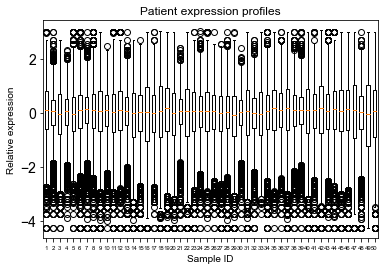

In [6]:
individual_expression_data = [expression_data.iloc[:,i] for i in range(50)]
matplotlib.pyplot.boxplot(individual_expression_data)
matplotlib.pyplot.title("Patient expression profiles")
matplotlib.pyplot.ylabel("Relative expression")
matplotlib.pyplot.xlabel("Sample ID")
matplotlib.pyplot.xticks(fontsize=6)

In [17]:
expression_data.head()

,bd556315-a050-465f-9a41-bdebe7e3eb61,4a0d9b7a-427c-4446-9fbd-ebb4b55b0469,225ccdc9-0d78-4d35-a969-080e6db2d42b,28973531-fd03-4f86-8cf5-4c6941560c37,f40edd33-8549-48a2-9fc7-a9313468b155,05862db6-8464-4336-9e34-e9b5ee863829,456bf061-467d-4bd8-bf71-b0a54ef06dea,0f8ed930-950b-4bae-a02d-e598b74bd82b,40d9de72-e2ee-4bd1-9c1f-b5a6df9ce3e1,334ec5ef-bc13-4a08-b60e-445108510a95,...,b71a52ae-68fb-47c3-89da-24a42e947a8c,c633bd52-3f48-49b8-bb20-2aad7b910a47,082418be-42c4-4717-95f4-755ed21d4366,de2ffea0-e172-45e2-aa15-f543758deb78,1324ee08-213e-44c7-b28a-849d091ce308,0ca8f6dd-6ffc-416c-8f06-5dee152618a9,7354b3fd-3ab9-4ca6-92ab-deb63649cf60,e87558c3-8f26-480e-853c-2e8ec6f39aca,d73c2a36-6943-4e5b-a019-d760a38149d2,7a284ab1-3849-4c83-ae30-86cf1136f641
ENSG00000000003,-0.094405,0.260769,-0.983215,0.139033,0.714635,-2.285526,0.023695,-1.082944,0.454221,1.346925,...,1.304361,-0.107872,-0.734785,0.163525,-1.177459,-0.496608,1.351545,-2.806989,-0.480871,1.838497
ENSG00000000419,1.225141,0.168866,0.352297,-0.778301,0.151589,1.813657,-1.556273,0.103661,-1.274790,-0.844377,...,-0.809601,-0.555290,0.158825,-0.130993,0.622304,1.394122,-0.003261,2.557093,0.313173,1.178255
ENSG00000000457,-1.354761,0.606640,-1.240550,-0.124491,-2.049185,1.047216,1.151720,1.531698,1.477663,1.766538,...,0.189733,1.220342,1.124560,2.702898,0.153538,0.857353,0.347672,-0.640853,-1.818440,1.705317
ENSG00000000460,0.798532,0.290680,-0.506493,-1.192018,-2.264912,0.323971,0.522695,-0.270629,0.714506,0.485364,...,-0.396965,1.483138,0.554587,1.337077,-0.078147,1.228703,-0.741768,-0.239310,0.203825,1.813155
ENSG00000000938,1.133124,0.726649,1.745460,0.846289,0.738792,-0.598823,0.652363,-0.593575,-3.208457,-0.572784,...,-0.037635,0.432769,0.287545,-0.587111,-2.202943,-0.422465,-0.697060,-3.011105,0.345675,-1.964319


In [16]:
#expression_data.loc['ENSG00000197046']
expression_data.loc['ENSG00000000003']


bd556315-a050-465f-9a41-bdebe7e3eb61   -0.094405
4a0d9b7a-427c-4446-9fbd-ebb4b55b0469    0.260769
225ccdc9-0d78-4d35-a969-080e6db2d42b   -0.983215
28973531-fd03-4f86-8cf5-4c6941560c37    0.139033
f40edd33-8549-48a2-9fc7-a9313468b155    0.714635
05862db6-8464-4336-9e34-e9b5ee863829   -2.285526
456bf061-467d-4bd8-bf71-b0a54ef06dea    0.023695
0f8ed930-950b-4bae-a02d-e598b74bd82b   -1.082944
40d9de72-e2ee-4bd1-9c1f-b5a6df9ce3e1    0.454221
334ec5ef-bc13-4a08-b60e-445108510a95    1.346925
3c99f021-2d9a-4322-96d1-27329c4abee3   -0.231949
9f0897a4-db0c-43f8-9d75-8debe9b6c847   -2.338022
2edcaaa7-63b4-40b4-abbe-5d7a84012e60   -1.323757
20b241da-8e69-4eb0-a7f2-4eb24cf76059    0.516934
432d86b3-b5d0-46c0-96d8-d7d5f4e6c3b6    0.430350
8ddc8e8b-d131-4f4e-96ec-078ced613de6   -0.605493
d65401e7-2bde-4b7e-b901-c173dd3cd33d    0.851003
96833a09-14ce-4483-b17d-f4328e0b68f5   -0.087500
3f9f9a93-3270-462b-a014-567f98a963cf   -0.284222
9d52a72f-06cb-4a2d-8aca-63ca74cbde70    0.057790
2ac83384-33be-4500-b

In [18]:
expression_data.index

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000278615', 'ENSG00000278619', 'ENSG00000278828',
       'ENSG00000278845', 'ENSG00000278888', 'ENSG00000279483',
       'ENSG00000280550', 'ENSG00000280670', 'ENSG00000280789',
       'ENSG00000281527'],
      dtype='object', length=11831)

In [15]:
type(expression_data)
expression_data


,bd556315-a050-465f-9a41-bdebe7e3eb61,4a0d9b7a-427c-4446-9fbd-ebb4b55b0469,225ccdc9-0d78-4d35-a969-080e6db2d42b,28973531-fd03-4f86-8cf5-4c6941560c37,f40edd33-8549-48a2-9fc7-a9313468b155,05862db6-8464-4336-9e34-e9b5ee863829,456bf061-467d-4bd8-bf71-b0a54ef06dea,0f8ed930-950b-4bae-a02d-e598b74bd82b,40d9de72-e2ee-4bd1-9c1f-b5a6df9ce3e1,334ec5ef-bc13-4a08-b60e-445108510a95,...,b71a52ae-68fb-47c3-89da-24a42e947a8c,c633bd52-3f48-49b8-bb20-2aad7b910a47,082418be-42c4-4717-95f4-755ed21d4366,de2ffea0-e172-45e2-aa15-f543758deb78,1324ee08-213e-44c7-b28a-849d091ce308,0ca8f6dd-6ffc-416c-8f06-5dee152618a9,7354b3fd-3ab9-4ca6-92ab-deb63649cf60,e87558c3-8f26-480e-853c-2e8ec6f39aca,d73c2a36-6943-4e5b-a019-d760a38149d2,7a284ab1-3849-4c83-ae30-86cf1136f641
ENSG00000000003,-0.094405,0.260769,-0.983215,0.139033,0.714635,-2.285526,0.023695,-1.082944,0.454221,1.346925,...,1.304361,-0.107872,-0.734785,0.163525,-1.177459,-0.496608,1.351545,-2.806989,-0.480871,1.838497
ENSG00000000419,1.225141,0.168866,0.352297,-0.778301,0.151589,1.813657,-1.556273,0.103661,-1.274790,-0.844377,...,-0.809601,-0.555290,0.158825,-0.130993,0.622304,1.394122,-0.003261,2.557093,0.313173,1.178255
ENSG00000000457,-1.354761,0.606640,-1.240550,-0.124491,-2.049185,1.047216,1.151720,1.531698,1.477663,1.766538,...,0.189733,1.220342,1.124560,2.702898,0.153538,0.857353,0.347672,-0.640853,-1.818440,1.705317
ENSG00000000460,0.798532,0.290680,-0.506493,-1.192018,-2.264912,0.323971,0.522695,-0.270629,0.714506,0.485364,...,-0.396965,1.483138,0.554587,1.337077,-0.078147,1.228703,-0.741768,-0.239310,0.203825,1.813155
ENSG00000000938,1.133124,0.726649,1.745460,0.846289,0.738792,-0.598823,0.652363,-0.593575,-3.208457,-0.572784,...,-0.037635,0.432769,0.287545,-0.587111,-2.202943,-0.422465,-0.697060,-3.011105,0.345675,-1.964319
ENSG00000000971,0.215607,0.560220,0.160904,0.869752,2.271936,0.387837,-0.478507,-0.147990,-0.329775,0.312404,...,-0.306035,-0.316872,1.010644,1.514201,0.068800,-0.629795,-0.472336,-2.067463,-1.483403,-0.765165
ENSG00000001036,0.107976,0.205330,-0.676604,0.153726,-0.098489,1.331243,-1.147550,-0.714016,-3.210181,-0.205935,...,0.020270,-1.441407,-0.428861,0.565568,0.714920,0.457480,-1.506309,-0.722993,-0.096556,0.594347
ENSG00000001084,-0.380845,-1.051031,-0.292037,1.053817,-0.394841,-0.338926,-1.147288,-1.262052,0.290618,-0.607204,...,-2.224829,-1.751278,-0.994662,0.008325,0.522613,0.850725,-1.573287,-0.157450,0.247232,1.346463
ENSG00000001167,0.603695,-0.032170,0.610781,0.077662,-0.078055,0.586031,-0.789991,-0.376426,0.716270,1.346943,...,-1.250217,0.325619,-0.184478,1.128664,0.039830,0.366830,-1.006219,0.014526,-1.099468,2.327640
ENSG00000001460,1.615538,-3.010624,-0.607956,-1.085937,0.129260,0.740853,1.100970,0.594180,0.024138,0.545020,...,-0.064510,-0.331507,-0.464172,-0.286096,0.673662,1.273519,-0.505961,0.670517,-0.201523,0.347956


In [ ]:
# plot histogram of ENSG00000197046